# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

2.11.0


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.csv")
print(data.shape)

(958, 10)


In [4]:
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [5]:
data.isnull().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

In [6]:
#Convert categorical to numerical
data.dtypes

TL       object
TM       object
TR       object
ML       object
MM       object
MR       object
BL       object
BM       object
BR       object
class      bool
dtype: object

In [7]:
def cat_to_num(x):
  if x =='b':
    return 0
  elif x == 'x':
    return 1
  elif x == 'o':
    return 2
  

In [8]:
data.columns

Index(['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'], dtype='object')

In [9]:
#Apply to all columns apart from class
def clean_col(df):
  df2 = df.copy()
  for col in df2.columns:
    if col in ['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR']:
      df2[col] = df2[col].apply(cat_to_num)
    else:
      return df2[col]
    return df2

In [10]:
data['TL'] = data['TL'].apply(cat_to_num)
data['TM'] = data['TM'].apply(cat_to_num)
data['TR'] = data['TR'].apply(cat_to_num)
data['ML'] = data['ML'].apply(cat_to_num)
data['MM'] = data['MM'].apply(cat_to_num)
data['MR'] = data['MR'].apply(cat_to_num)
data['BL'] = data['BL'].apply(cat_to_num)
data['BM'] = data['BM'].apply(cat_to_num)
data['BR'] = data['BR'].apply(cat_to_num)
#Couldnt get it to work in my previous function

In [11]:
data


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,2,2,1,2,2,True
1,1,1,1,1,2,2,2,1,2,True
2,1,1,1,1,2,2,2,2,1,True
3,1,1,1,1,2,2,2,0,0,True
4,1,1,1,1,2,2,0,2,0,True
...,...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1,False
954,2,1,2,1,1,2,1,2,1,False
955,2,1,2,1,2,1,1,2,1,False
956,2,1,2,2,1,1,1,2,1,False


In [12]:
data['class'] = data['class'].apply(lambda x: 1 if x==True else 0)

In [13]:
data

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,2,2,1,2,2,1
1,1,1,1,1,2,2,2,1,2,1
2,1,1,1,1,2,2,2,2,1,1
3,1,1,1,1,2,2,2,0,0,1
4,1,1,1,1,2,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1,0
954,2,1,2,1,1,2,1,2,1,0
955,2,1,2,1,2,1,1,2,1,0
956,2,1,2,2,1,1,1,2,1,0


In [14]:
#Define input and output
X = data.drop(["class"], axis=1)
y = data['class']

In [15]:
X

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1,1,1,1,2,2,1,2,2
1,1,1,1,1,2,2,2,1,2
2,1,1,1,1,2,2,2,2,1
3,1,1,1,1,2,2,2,0,0
4,1,1,1,1,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1
954,2,1,2,1,1,2,1,2,1
955,2,1,2,1,2,1,1,2,1
956,2,1,2,2,1,1,1,2,1


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: class, Length: 958, dtype: int64

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [17]:
#Split the training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

print(X_train.shape)
print(X_test.shape)

(670, 9)
(288, 9)


In [18]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer()
trans.fit(X_train)

X_train_trans = trans.transform(X_train)
X_test_trans  = trans.transform(X_test)

X_train = pd.DataFrame(X_train_trans, columns = X_train.columns)
X_test  = pd.DataFrame(X_test_trans,  columns = X_test.columns)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(patience=5) 

In [20]:
# Sequential() creates the baseline to build a Feed Forward network.
model = keras.Sequential()

#Adding layers
model.add(Dense(units = 100,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 50,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 2, activation='softmax')) #Predicting 2 numbers therefore units = 2 on output

#Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6,152
Trainable params: 6,152
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Fit the training data
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
21/21 [==============================] - 2s 5ms/step - loss: 0.6602 - accuracy: 0.6060
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6896
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.7448
Epoch 4/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.7567
Epoch 5/10
21/21 [==============================] - 0s 8ms/step - loss: 0.4722 - accuracy: 0.7761
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 0.4495 - accuracy: 0.7821
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 0.4253 - accuracy: 0.8104
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8328
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.8373
Epoch 10/10
21/21 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.8657


In [22]:
# evaluate model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)


9/9 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.7708
0.45345163345336914
0.7708333134651184


In [23]:
checkpoint_path = '/content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Whether or not save only the weights of each neuron.
    verbose=1 # To display the progress
)

In [24]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)


Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 1s - loss: 0.3295 - accuracy: 0.8563 - val_loss: 0.2996 - val_accuracy: 0.8806 - 1s/epoch - 38ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.2952 - accuracy: 0.8918 - val_loss: 0.2939 - val_accuracy: 0.8507 - 186ms/epoch - 7ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.2721 - accuracy: 0.9011 - val_loss: 0.2835 - val_accuracy: 0.8955 - 202ms/epoch - 7ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.2509 - accuracy: 0.9179 - val_loss: 0.2904 - val_accuracy: 0.8507 - 198ms/epoch - 7ms/step
Epoch 5/60

Epoch 5: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.2356 - accura

In [25]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

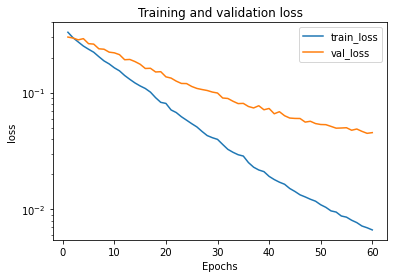

In [26]:
plot_metric(history,'loss')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [27]:
# Load the model
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5')

In [28]:
X_test_samp = X.sample(10)
y_test_samp = y.sample(10)

In [29]:
predictions = model2.predict(X_test_samp)

1/1 [==============================] - 0s 186ms/step


In [30]:
predictions

array([[4.3840474e-01, 5.6159520e-01],
       [1.0484797e-04, 9.9989504e-01],
       [9.9999374e-01, 6.1466412e-06],
       [2.7168337e-02, 9.7283167e-01],
       [4.3245965e-01, 5.6754041e-01],
       [9.9999636e-01, 3.5271844e-06],
       [9.9654979e-01, 3.4500819e-03],
       [9.9830604e-01, 1.6939015e-03],
       [5.5343974e-01, 4.4656032e-01],
       [9.9266112e-01, 7.3388824e-03]], dtype=float32)

In [31]:
comparison = pd.DataFrame(predictions, y_test_samp)
comparison['Predicted'] = comparison.idxmax(axis=1)

In [32]:
comparison.drop(columns=[0,1], inplace=True)

In [33]:
comparison.reset_index(inplace=True)
comparison

,class,Predicted
0,0,1
1,0,1
2,1,0
3,1,1
4,0,1
5,1,0
6,1,0
7,0,0
8,1,0
9,0,0


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [34]:
# your code here
model = keras.Sequential()

#Adding layers
model.add(Dense(units = 100,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 50,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 25,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 2, activation='softmax')) #Predicting 2 numbers therefore units = 2 on output

#Compile model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1000      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dense_6 (Dense)             (None, 2)                 52        
                                                                 
Total params: 7,377
Trainable params: 7,377
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)


Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 2s - loss: 0.6129 - accuracy: 0.6679 - val_loss: 0.5854 - val_accuracy: 0.6642 - 2s/epoch - 63ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.5407 - accuracy: 0.7127 - val_loss: 0.5371 - val_accuracy: 0.6940 - 188ms/epoch - 7ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.4817 - accuracy: 0.7743 - val_loss: 0.5114 - val_accuracy: 0.7090 - 179ms/epoch - 7ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.4404 - accuracy: 0.7817 - val_loss: 0.4832 - val_accuracy: 0.7463 - 156ms/epoch - 6ms/step
Epoch 5/60

Epoch 5: saving model to /content/drive/MyDrive/Iron Hack/Week_8/lab/tic-tac-toe.model.hdf5
27/27 - 0s - loss: 0.3854 - accura

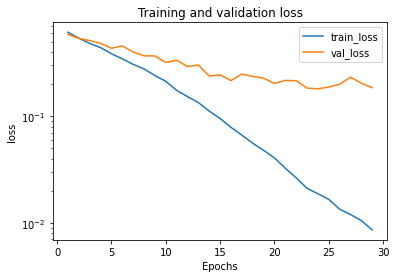

In [36]:
plot_metric(history,'loss')

In [37]:
# evaluate model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)


9/9 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8924
0.2661224901676178
0.8923611044883728


**Which approach(es) did you find helpful to improve your model performance?**

In [38]:
#Adding more layers and the learning rate